O modelo Long Short-Term Memory (LSTM) é uma forma especializada de rede neural recorrente (RNN) projetada para lidar com sequências de dados. Sua principal vantagem sobre RNNs tradicionais é a capacidade de capturar dependências de longo prazo em sequências de dados, o que a torna particularmente eficaz para tarefas como previsão de séries temporais.

Estrutura Básica do LSTM
Um LSTM é composto por diversas unidades LSTM, onde cada unidade lida com um elemento (por exemplo, um ponto de tempo) da sequência de entrada. A estrutura interna de uma unidade LSTM é projetada para regular o fluxo de informações, que inclui:

Esquecimento: Decidir quais informações serão descartadas do estado da célula.
Entrada: Atualizar o estado da célula com novas informações.
Saída: Determinar o próximo estado oculto (output), que é usado para previsões ou como entrada para a próxima célula na sequência.
Componentes Matemáticos
Cada unidade LSTM opera com três portas principais que controlam o estado e o fluxo de informações:

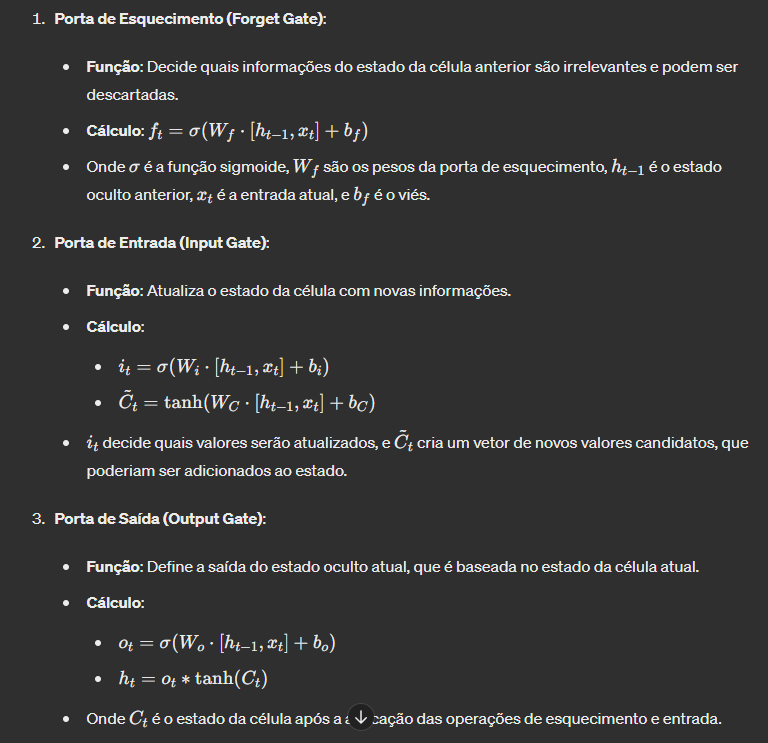

Atualização do Estado da Célula
O estado da célula é atualizado pela combinação das informações que decidimos esquecer e as novas informações a serem adicionadas:

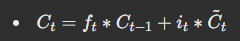

Simplificação para Compreensão
Em termos simples, um LSTM gerencia o que lembrar e o que descartar em uma sequência de dados, permitindo que ele preserve informações úteis por longos períodos, o que é crucial para prever futuros pontos de dados em séries temporais. Cada passo no tempo envolve decisões cuidadosamente reguladas sobre atualizar informações, descartar informações irrelevantes e passar informações relevantes adiante, tudo isso através de uma combinação de operações matemáticas que mantêm e transformam o estado interno.

1. IMPORTAÇÃO DE BIBLIOTECAS E CARREGAMENTO DA BASE

In [1]:
#pip install keras
#pip install tensorflow
#pip install tensorflow - caso necessário

#pip install --upgrade keras - caso necessário

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
import random as python_random

# Carregar dados
data = pd.read_csv('USD_BRL Dados Históricos.csv', delimiter=';', decimal=',' , parse_dates=True, index_col='Data')
data = data[['Último']]  # Mantendo como DataFrame

2. FUNÇÃO PARA RESETAR AS SEMENTES ALEATÓRIAS

In [2]:
def reset_random_seeds():
    np.random.seed(42)           # Semente para o NumPy
    python_random.seed(42)       # Semente para a biblioteca random do Python
    tf.random.set_seed(42)       # Semente para o TensorFlow

# Chamando a função de resetar as sementes aleatórias
reset_random_seeds()

3. NORMALIZAR OS DADOS

Resumindo, este código normaliza os dados de uma série temporal e, em seguida, cria sequências de entrada e saída para modelagem preditiva.


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
data['Último'] = scaler.fit_transform(data[['Último']])

# Função para criar sequências de dados
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset.iloc[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset.iloc[i + look_back, 0])
    return np.array(X), np.array(Y)

4. PREPARAR DADOS DE ENTRADA

Chama a função create_dataset, passando o DataFrame data e o valor look_back como argumentos.
A função create_dataset retorna duas arrays, X e Y. Aqui, X contém as sequências de 5 períodos anteriores, e Y contém os valores alvo, ou seja, o valor seguinte ao período considerado.

Utiliza a função reshape do NumPy para alterar a forma (shape) do array X.
O reshape muda o formato de X para ser compatível com modelos de deep learning que esperam dados de entrada em uma forma tridimensional: [samples, time steps, features].

In [4]:
# Preparar dados de entrada
look_back = 5
X, Y = create_dataset(data, look_back)

# Reshape de X para o formato [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [4]:
# Preparar dados de entrada
look_back = 5
X, Y = create_dataset(data, look_back)

# Dividir dados em treinamento e teste
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
trainX, testX = X[0:train_size], X[train_size:len(X)]
trainY, testY = Y[0:train_size], Y[train_size:len(Y)]

# Reshape de X para o formato [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

5. CONSTRUÇÃO DO MODELO

Este código cria e treina um modelo LSTM para prever valores futuros em uma série temporal. O modelo usa sequências de 5 períodos históricos para prever o próximo valor. A camada LSTM captura dependências temporais, enquanto a camada densa fornece a previsão final. O modelo é treinado por 100 épocas com um tamanho de lote de 1, utilizando o otimizador Adam e a função de perda de erro quadrático médio.

Uma época é uma passagem completa pelo conjunto de dados de treinamento. O valor 100 significa que o modelo verá todos os exemplos de treinamento 100 vezes.

In [ ]:
# Construir o modelo LSTM
model = Sequential([
    LSTM(50, input_shape=(look_back, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

In [5]:
# Construir o modelo LSTM
model = Sequential([
    LSTM(30, input_shape=(look_back, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50


c:\Users\NTI-003\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 - 1s - 13ms/step - loss: 0.0171
Epoch 2/50
62/62 - 0s - 1ms/step - loss: 0.0053
Epoch 3/50
62/62 - 0s - 887us/step - loss: 0.0049
Epoch 4/50
62/62 - 0s - 703us/step - loss: 0.0046
Epoch 5/50
62/62 - 0s - 1ms/step - loss: 0.0044
Epoch 6/50
62/62 - 0s - 808us/step - loss: 0.0043
Epoch 7/50
62/62 - 0s - 837us/step - loss: 0.0042
Epoch 8/50
62/62 - 0s - 1ms/step - loss: 0.0041
Epoch 9/50
62/62 - 0s - 819us/step - loss: 0.0041
Epoch 10/50
62/62 - 0s - 786us/step - loss: 0.0041
Epoch 11/50
62/62 - 0s - 1ms/step - loss: 0.0040
Epoch 12/50
62/62 - 0s - 810us/step - loss: 0.0040
Epoch 13/50
62/62 - 0s - 874us/step - loss: 0.0040
Epoch 14/50
62/62 - 0s - 961us/step - loss: 0.0040
Epoch 15/50
62/62 - 0s - 806us/step - loss: 0.0039
Epoch 16/50
62/62 - 0s - 806us/step - loss: 0.0039
Epoch 17/50
62/62 - 0s - 1ms/step - loss: 0.0039
Epoch 18/50
62/62 - 0s - 835us/step - loss: 0.0039
Epoch 19/50
62/62 - 0s - 807us/step - loss: 0.0039
Epoch 20/50
62/62 - 0s - 806us/step - loss: 0.0038
Epoch 21/50

Epoch 1/50
62/62 - 0s - 3ms/step - loss: 0.0033 - val_loss: 0.0153
Epoch 2/50
62/62 - 0s - 1ms/step - loss: 0.0033 - val_loss: 0.0150
Epoch 3/50
62/62 - 0s - 1ms/step - loss: 0.0033 - val_loss: 0.0148
Epoch 4/50
62/62 - 0s - 1ms/step - loss: 0.0032 - val_loss: 0.0146
Epoch 5/50
62/62 - 0s - 1ms/step - loss: 0.0032 - val_loss: 0.0144
Epoch 6/50
62/62 - 0s - 1ms/step - loss: 0.0031 - val_loss: 0.0144
Epoch 7/50
62/62 - 0s - 1ms/step - loss: 0.0031 - val_loss: 0.0146
Epoch 8/50
62/62 - 0s - 1ms/step - loss: 0.0031 - val_loss: 0.0150
Epoch 9/50
62/62 - 0s - 1ms/step - loss: 0.0030 - val_loss: 0.0157
Epoch 10/50
62/62 - 0s - 1ms/step - loss: 0.0030 - val_loss: 0.0167
Epoch 11/50
62/62 - 0s - 1ms/step - loss: 0.0030 - val_loss: 0.0180
Epoch 12/50
62/62 - 0s - 1ms/step - loss: 0.0030 - val_loss: 0.0193
Epoch 13/50
62/62 - 0s - 1ms/step - loss: 0.0030 - val_loss: 0.0206
Epoch 14/50
62/62 - 0s - 1ms/step - loss: 0.0030 - val_loss: 0.0217
Epoch 15/50
62/62 - 0s - 1ms/step - loss: 0.0030 - val_lo

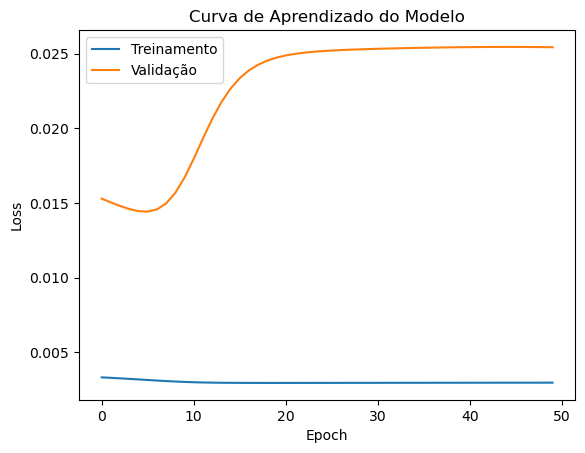

In [6]:
history = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2, validation_data=(testX, testY))

# Plote das curvas de erro
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Curva de Aprendizado do Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [7]:
# Predições
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverter as predições
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [8]:
# Calcular métricas de erro
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print(f'Treinamento RMSE: {trainScore:.2f}')
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print(f'Teste RMSE: {testScore:.2f}')

mae = mean_absolute_error(testY[0], testPredict[:,0])
print(f'Teste MAE: {mae:.2f}')

mape = np.mean(np.abs((testY[0] - testPredict[:,0]) / testY[0])) * 100
print(f'Teste MAPE: {mape:.2f}%')

Treinamento RMSE: 0.02
Teste RMSE: 0.07
Teste MAE: 0.05
Teste MAPE: 1.02%


6. PREVISÕES PARA OS PRÓXIMOS DIAS

Este trecho de código faz previsões para os próximos 10 dias usando o modelo LSTM treinado. Ele utiliza os últimos look_back valores dos dados como ponto de partida, fazendo previsões iterativas e atualizando os dados de entrada para incluir cada nova previsão. No final, as previsões são desnormalizadas para retornar aos valores originais da série temporal.

In [11]:
# Fazer previsões para os próximos 10 dias
future_steps = 10
future_data = data[-look_back:].values.flatten()
predictions_future = []

for _ in range(future_steps):
    pred = model.predict(future_data.reshape(1, look_back, 1))
    predictions_future.append(pred.flatten()[0])
    future_data = np.append(future_data[1:], pred.flatten())

predictions_future = scaler.inverse_transform(np.array(predictions_future).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step


7. DATAFRAME E GRÁFICO

,Data,Último
0,2024-05-11,5.145938
1,2024-05-12,5.156607
2,2024-05-13,5.179669
3,2024-05-14,5.201186
4,2024-05-15,5.232191
5,2024-05-16,5.259075
6,2024-05-17,5.279645
7,2024-05-18,5.318045
8,2024-05-19,5.369648
9,2024-05-20,5.423423


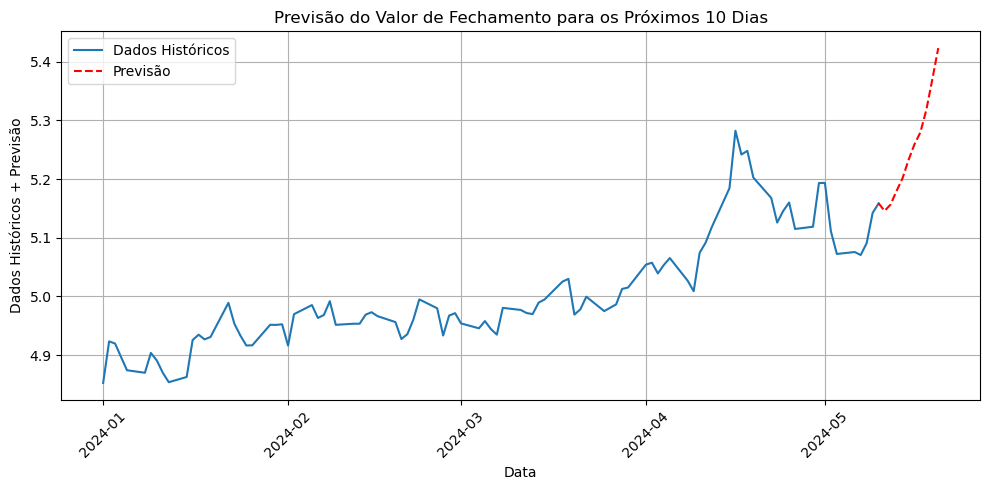

In [12]:
# Construir um DataFrame para as previsões futuras

# Plotar dados originais e previsões futuras
last_date = data.index[-1]
last_date_ajus = pd.to_datetime(last_date, format='%d/%m/%Y')

future_dates = pd.date_range(start=last_date_ajus, periods=future_steps + 1, freq='D')[1:]

list_predictions_future = []

for i in predictions_future:
    list_predictions_future.extend(i.tolist())

forecast_future= pd.DataFrame({'Data': future_dates, 'Último': list_predictions_future})

list_scaler = []

for i in scaler.inverse_transform(data):
    list_scaler.extend(i.tolist())

data_hist = pd.DataFrame({'Data': data.index, 'Último': list_scaler})

data_concat = pd.concat([data_hist[["Data", "Último"]], forecast_future[["Data","Último"]]], axis=0)

data_concat["Data"] = pd.to_datetime(data_concat["Data"], format='%d/%m/%Y')

data_concat = data_concat.sort_values(by = "Data", ascending= True)

display(data_concat.tail(future_steps))

# Plotando a previsão
plt.figure(figsize=(10, 5))
plt.plot(data_concat['Data'][:95], data_concat['Último'][:95], label='Dados Históricos')
plt.plot(data_concat['Data'][94:], data_concat['Último'][94:], label='Previsão', color='red', linestyle='dashed')
#plt.plot(data_concat['Data'], data_concat['Último'], label='Previsão', color='red', linestyle='dashed')
plt.title(f'Previsão do Valor de Fechamento para os Próximos {future_steps} Dias')
plt.xlabel('Data')
plt.ylabel('Dados Históricos + Previsão')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()